# SNiFi: CICIoT2023 Dataset Analysis

---

### Description
This notebook is part of a machine learning (ML) module carried out as a part of the SNiFi research and development project.

### Objective
* Analysis of the dataset structure, including key features identification and attack categories. 
* Use of the [CIC IoT Attack Dataset 2023](https://www.unb.ca/cic/datasets/iotdataset-2023.html), containing diverse data related to attacks on IoT devices.

### Table of Contents
1. [Introduction](#Introduction)
2. [Glossary of Features](#Glossary-of-Features)
3. [Data Reduction Strategy](#Data-Reduction-Strategy)
4. [Data Preparation](#Data-Preparation)
5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
---

### Introduction
The increase in smart device usage has brought greater connectivity to people's homes and lives. However, this progress also introduces significant security risks, as many of these devices lack adequate protection. This notebook focuses on analyzing data from such devices to uncover and highlight their security weaknesses. The primary objective is to deepen domain knowledge in this area.

---

### Glossary of Features
1. **flow_duration**: Duration of the packet’s flow.
3. **header_length**: Header Length.
4. **protocol_type**: IP, UDP, TCP, IGMP, ICMP, Unknown (Integers).
5. **duration**: Time-to-Live (ttl).
6. **rate**: Rate of packet transmission in a flow.
7. **srate**: Rate of outbound packets transmission in a flow.
8. **drate**: Rate of inbound packets transmission in a flow.
9. **fin_flag_number**: Fin flag value.
10. **syn_flag_number**: Syn flag value.
11. **rst_flag_number**: Rst flag value.
12. **psh_flag_number**: Psh flag value.
13. **ack_flag_number**: Ack flag value.
14. **ece_flag_number**: Ece flag value.
15. **cwr_flag_number**: Cwr flag value.
16. **ack_count**: Number of packets with ack flag set in the same flow.
17. **syn_count**: Number of packets with syn flag set in the same flow.
18. **fin_count**: Number of packets with fin flag set in the same flow.
19. **urg_count**: Number of packets with urg flag set in the same flow.
20. **rst_count**: Number of packets with rst flag set in the same flow.
21. **http**: Indicates if the application layer protocol is HTTP.
22. **https**: Indicates if the application layer protocol is HTTPS.
23. **dns**: Indicates if the application layer protocol is DNS.
24. **telnet**: Indicates if the application layer protocol is Telnet.
25. **smtp**: Indicates if the application layer protocol is SMTP.
26. **ssh**: Indicates if the application layer protocol is SSH.
27. **irc**: Indicates if the application layer protocol is IRC.
28. **tcp**: Indicates if the transport layer protocol is TCP.
29. **udp**: Indicates if the transport layer protocol is UDP.
30. **dhcp**: Indicates if the application layer protocol is DHCP.
31. **arp**: Indicates if the link layer protocol is ARP.
32. **icmp**: Indicates if the network layer protocol is ICMP.
33. **ipv**: Indicates if the network layer protocol is IP.
34. **llc**: Indicates if the link layer protocol is LLC.
35. **tot_sum**: Summation of packets lengths in flow.
36. **min**: Minimum packet length in the flow.
37. **max**: Maximum packet length in the flow.
38. **avg**: Average packet length in the flow.
39. **std**: Standard deviation of packet length in the flow.
40. **tot_size**: Packet’s length.
41. **iat**: The time difference with the previous packet.
42. **number**: The number of packets in the flow.
43. **magnitude**: (Average of the lengths of incoming packets in the flow + average of the lengths of outgoing packets in the flow)^0.5.
44. **radius**: (Variance of the lengths of incoming packets in the flow + variance of the lengths of outgoing packets in the flow)^0.5.
45. **covariance**: Covariance of the lengths of incoming and outgoing packets.
46. **variance**: Variance of the lengths of incoming packets in the flow / variance of the lengths of outgoing packets in the flow.
47. **weight**: Number of incoming packets × Number of outgoing packets.

---

### Data Reduction Strategy
Given the hardware limitations and the large complexity of the dataset — nearly 13GB across 169 .csv files — a decision was made to develop an additional script. This script efficiently downsamples the dataset to create a smaller, more manageable subset for analysis, while preserving the variability and integrity of the data across all classes. The script strategically samples **0.001%** of the rows from each .csv file, ensuring a balanced representation from each label and utilizes a mapping function to convert protocol numbers to readable names, significantly enhancing the dataset’s usability for machine learning purposes.

---

*Citation: E. C. P. Neto, S. Dadkhah, R. Ferreira, A. Zohourian, R. Lu, A. A. Ghorbani. "[CICIoT2023: A real-time dataset and benchmark for large-scale attacks in IoT environment](https://www.mdpi.com/1424-8220/23/13/5941)," Sensor (2023) – (submitted to Journal of Sensors).*

---

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from ml.data_handling import DataLoader

RANDOM_STATE = 42

ML_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
DATASET_PATH = os.path.join(ML_DIR, 'data', 'preprocessed', 'csv', '0.001percent_original_labels.csv')

IANA_MAP = { 
    "0": "HOPOPT", "1": "ICMP", "2": "IGMP", "3": "GGP", "4": "IPv4", "5": "ST", 
    "6": "TCP", "7": "CBT", "8": "EGP", "9": "IGP", "10": "BBN-RCC-MON", "11": "NVP-II", 
    "12": "PUP", "13": "ARGUS (deprecated)", "14": "EMCON", "15": "XNET", "16": "CHAOS", 
    "17": "UDP", "18": "MUX", "19": "DCN-MEAS", "20": "HMP", "21": "PRM", "22": "XNS-IDP", 
    "23": "TRUNK-1", "24": "TRUNK-2", "25": "LEAF-1", "26": "LEAF-2", "27": "RDP", 
    "28": "IRTP", "29": "ISO-TP4", "30": "NETBLT", "31": "MFE-NSP", "32": "MERIT-INP", 
    "33": "DCCP", "34": "3PC", "35": "IDPR", "36": "XTP", "37": "DDP", "38": "IDPR-CMTP", 
    "39": "TP++", "40": "IL", "41": "IPv6", "42": "SDRP", "43": "IPv6-Route", 
    "44": "IPv6-Frag", "45": "IDRP", "46": "RSVP", "47": "GRE", "48": "DSR", "49": "BNA", 
    "50": "ESP", "51": "AH", "52": "I-NLSP", "53": "SWIPE (deprecated)", "54": "NARP", 
    "55": "MOBILE", "56": "TLSP", "57": "SKIP", "58": "IPv6-ICMP", "59": "IPv6-NoNxt", 
    "60": "IPv6-Opts", "62": "CFTP", "64": "SAT-EXPAK", "65": "KRYPTOLAN", "66": "RVD", 
    "67": "IPPC", "69": "SAT-MON", "70": "VISA", "71": "IPCV", "72": "CPNX", "73": "CPHB", 
    "74": "WSN", "75": "PVP", "76": "BR-SAT-MON", "77": "SUN-ND", "78": "WB-MON", 
    "79": "WB-EXPAK", "80": "ISO-IP", "81": "VMTP", "82": "SECURE-VMTP", "83": "VINES", 
    "84": "IPTM", "85": "NSFNET-IGP", "86": "DGP", "87": "TCF", "88": "EIGRP", 
    "89": "OSPFIGP", "90": "Sprite-RPC", "91": "LARP", "92": "MTP", "93": "AX.25", 
    "94": "IPIP", "95": "MICP (deprecated)","96": "SCC-SP", "97": "ETHERIP", "98": "ENCAP", 
    "100": "GMTP", "101": "IFMP", "102": "PNNI", "103": "PIM", "104": "ARIS", "105": "SCPS", 
    "106": "QNX", "107": "A/N", "108": "IPComp", "109": "SNP", "110": "Compaq-Peer", 
    "111": "IPX-in-IP", "112": "VRRP", "113": "PGM", "114": "", "115": "L2TP", "116": "DDX",  
    "117": "IATP", "118": "STP", "119": "SRP", "120": "UTI", "121": "SMP", 
    "122": "SM (deprecated)", "123": "PTP","124": "ISIS over IPv4", "125": "FIRE", 
    "126": "CRTP", "127": "CRUDP", "128": "SSCOPMCE", "129": "IPLT", "130": "SPS", 
    "131": "PIPE", "132": "SCTP",  "133": "FC", "134": "RSVP-E2E-IGNORE", 
    "135": "Mobility Header", "136": "UDPLite", "137": "MPLS-in-IP", "138": "manet", 
    "139": "HIP", "140": "Shim6", "141": "WESP", "142": "ROHC", "143": "Ethernet", 
    "144": "AGGFRAG", "145": "NSH"
}
IANA_REVERSE_MAP = {v: k for k, v in IANA_MAP.items()}

## Data Preparation
This section provides a CICIoT2023 preparation for subsequent analysis. The steps include loading and splitting the dataset, data cleaning and preprocessing, feature selection and data normalization.

### Loading the Dataset

In [2]:
data_loader = DataLoader(os.path.dirname(DATASET_PATH))
df = data_loader.load_data([os.path.basename(DATASET_PATH)])
print(f"\nNumber of rows and columns: {df.shape}\n")
print(f"Column names: {df.columns.tolist()}\n")

100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


Number of rows and columns: (44547, 47)

Column names: ['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate', 'srate', 'drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'http', 'https', 'dns', 'telnet', 'smtp', 'ssh', 'irc', 'tcp', 'udp', 'dhcp', 'arp', 'icmp', 'ipv', 'llc', 'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'number', 'magnitue', 'radius', 'covariance', 'variance', 'weight', 'label']



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44547 entries, 0 to 44546
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_duration    44547 non-null  float64
 1   header_length    44547 non-null  float64
 2   protocol_type    44547 non-null  object 
 3   duration         44547 non-null  float64
 4   rate             44547 non-null  float64
 5   srate            44547 non-null  float64
 6   drate            44547 non-null  float64
 7   fin_flag_number  44547 non-null  float64
 8   syn_flag_number  44547 non-null  float64
 9   rst_flag_number  44547 non-null  float64
 10  psh_flag_number  44547 non-null  float64
 11  ack_flag_number  44547 non-null  float64
 12  ece_flag_number  44547 non-null  float64
 13  cwr_flag_number  44547 non-null  float64
 14  ack_count        44547 non-null  float64
 15  syn_count        44547 non-null  float64
 16  fin_count        44547 non-null  float64
 17  urg_count   

In [4]:
df.head()

,flow_duration,header_length,protocol_type,duration,rate,srate,drate,fin_flag_number,syn_flag_number,rst_flag_number,...,std,tot_size,iat,number,magnitue,radius,covariance,variance,weight,label
0,0.000000,54.00,TCP,64.0,1105.072849,1105.072849,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334427e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.062275,86.18,TCP,63.9,11.665414,11.665414,0.0,0.0,0.0,0.0,...,1.684227,54.8,8.303412e+07,9.5,10.547358,2.385083,10.679831,0.28,141.55,DDoS-TCP_Flood
2,3.079319,1045929.84,UDP,64.0,608.989410,608.989410,0.0,0.0,0.0,0.0,...,0.000000,554.0,8.376294e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55,Mirai-udpplain
3,0.149134,26432.50,UDP,64.0,3407.417776,3407.417776,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.309870e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,0.000000,54.20,TCP,64.0,0.486565,0.486565,0.0,0.0,0.0,0.0,...,0.685993,54.2,8.331387e+07,9.5,10.411546,0.971654,3.691511,0.13,141.55,DDoS-PSHACK_Flood


In [5]:
df.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

The dataset, comprising 44547 rows and 47 columns, showcases a diverse range of data types including float64 and object. 

The columns encompass various network-related features such as `flow_duration`, `header_length`, and `protocol_type`, alongside statistical measures like `min`, `max`, `avg`, and `std`. 

Additionally, it includes categorical data related to network protocols (`protocol_type`), as well as a `label` column for classification purposes.

### Data Cleaning and Preprocessing
#### Missing values

In [6]:
missing_values_summary = df.isnull().sum()
missing_values_summary = missing_values_summary[missing_values_summary > 0]

if missing_values_summary.empty:
    missing_values_info = "No missing values in the data."
else:
    missing_values_info = missing_values_summary

missing_values_info

'No missing values in the data.'

In [7]:
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


The dataset contains no missing values, indicating a complete set of records. Also, the duplicates in the dataset have been dropped.

#### Statistical Summary

In [8]:
statistical_summary = df.describe()
statistical_summary

,flow_duration,header_length,duration,rate,srate,drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,avg,std,tot_size,iat,number,magnitue,radius,covariance,variance,weight
count,44547.000000,4.454700e+04,44547.000000,4.454700e+04,4.454700e+04,44547.000000,44547.000000,44547.000000,44547.000000,44547.000000,...,44547.000000,44547.000000,44547.000000,4.454700e+04,44547.000000,44547.000000,44547.000000,4.454700e+04,44547.000000,44547.000000
mean,1.937100,6.504248e+04,65.894261,8.912906e+03,8.912906e+03,0.000008,0.088805,0.210205,0.091948,0.089658,...,114.329256,26.628139,114.055520,8.318963e+07,9.499594,12.722317,37.631620,2.463189e+04,0.080461,141.537149
std,22.913540,4.118159e+05,12.584562,9.874375e+04,9.874375e+04,0.001585,0.284465,0.407459,0.288956,0.285695,...,221.367487,143.838707,219.894842,1.425644e+07,0.684070,8.039651,203.441214,2.731596e+05,0.203658,17.603088
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,64.000000,2.020092e+00,2.020092e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,50.000000,8.307203e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,64.000000,1.508356e+01,1.508356e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.000000,54.000000,8.312416e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.091765,1.820000e+02,64.000000,1.147809e+02,1.147809e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.014472,0.294933,54.060000,8.334374e+07,9.500000,10.393232,0.394612,7.578980e-01,0.070000,141.550000
max,2883.719000,8.977439e+06,251.820000,7.340032e+06,7.340032e+06,0.334403,1.000000,1.000000,1.000000,1.000000,...,5936.663175,4332.727851,3729.300000,1.668630e+08,13.500000,105.972598,6127.402489,2.147107e+07,1.000000,244.600000


Statistical summary of the dataset shows significant variation across features, with `flow_duration` having a mean of 1.937 and a high standard deviation of 22.914, indicating large variations in flow durations. Additionally, features like `rate` and `srate` also show wide ranges with mean values around 8912.906 and standard deviations around 98743.75, highlighting the diverse nature of the network traffic data.

## Exploratory Data Analysis
### Attack Class Distribution

In [9]:
class_distribution = df['label'].value_counts()
print(class_distribution)

label
DDoS-ICMP_Flood            7112
DDoS-UDP_Flood             5320
DDoS-TCP_Flood             4417
DDoS-PSHACK_Flood          4014
DDoS-SYN_Flood             3975
DDoS-RSTFINFlood           3961
DDoS-SynonymousIP_Flood    3512
DoS-UDP_Flood              3227
DoS-TCP_Flood              2589
DoS-SYN_Flood              1954
BenignTraffic              1016
Mirai-greeth_flood          907
Mirai-udpplain              804
Mirai-greip_flood           660
DDoS-ICMP_Fragmentation     400
MITM-ArpSpoofing            205
DDoS-ACK_Fragmentation      200
DDoS-UDP_Fragmentation      200
DNS_Spoofing                 42
Recon-HostDiscovery          31
Recon-OSScan                  1
Name: count, dtype: int64


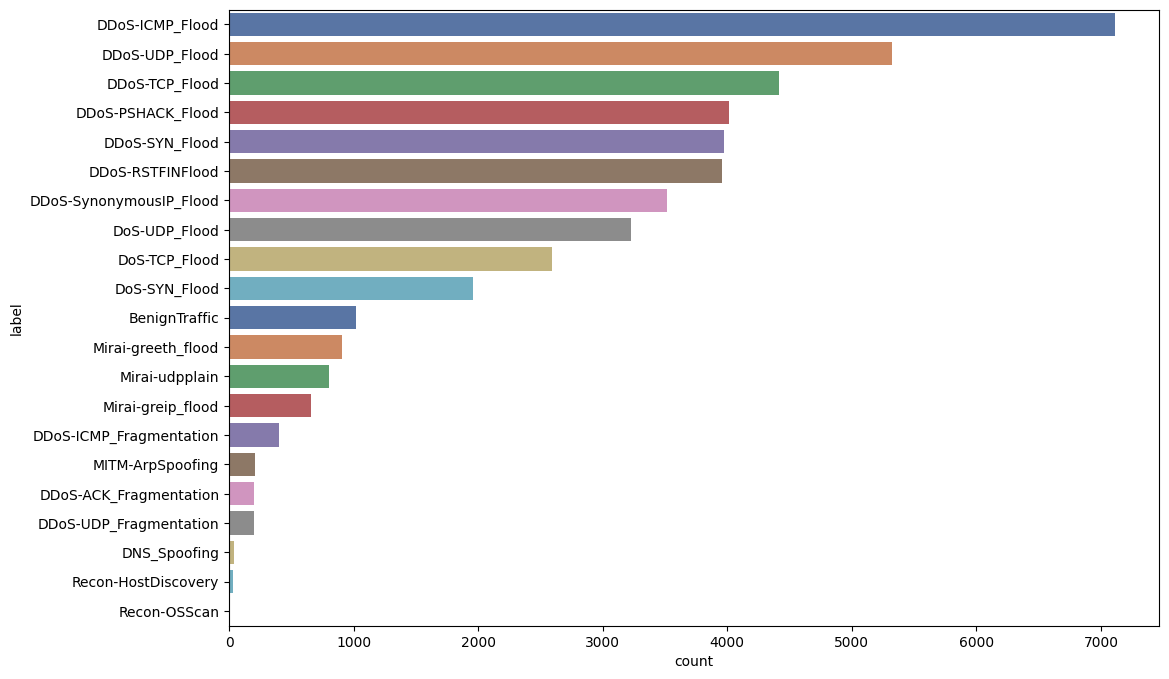

In [10]:
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

plt.figure(figsize=(12, 8))

sns.barplot(
    data=label_counts,
    y='label', 
    x='count', 
    palette='deep',
    hue='label',
    legend=False
)

plt.show()

**Attack Class Distribution**
* The dataset is heavily dominated by `DDoS-ICMP_Flood` (7112 instances), `DDoS-UDP_Flood` (5320 instances), and `DDoS-TCP_Flood` (4417 instances).
* The least represented classes are `Recon-OSScan` (1 instance), `Recon-HostDiscovery` (31 instances), and `DNS_Spoofing` (42 instances).

**Class Imbalance**
* There is a significant class imbalance, with a large number of occurrences of some types of DDoS attacks, while other types of attacks are poorly represented. This is worth noting when training models, as this imbalance can affect model performance.

### Features Distribution
#### Protocol Type Distribution

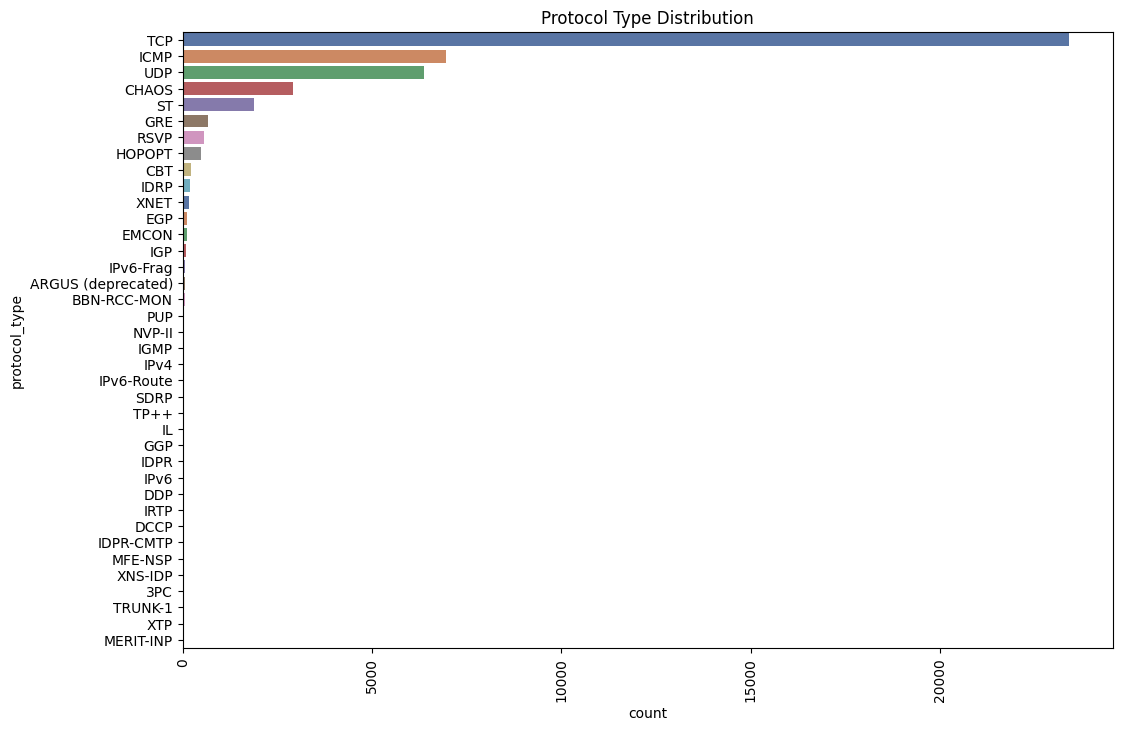

In [11]:
label_counts = df['protocol_type'].value_counts().reset_index()
label_counts.columns = ['protocol_type', 'count']

plt.figure(figsize=(12, 8))

sns.barplot(
    data=label_counts,
    y='protocol_type', 
    x='count', 
    palette='deep',
    hue='protocol_type',
    dodge=False,
    legend=False
)

plt.xticks(rotation=90)
plt.title('Protocol Type Distribution')
plt.show()

**Dominant Protocols**
* **TCP**: It is the most prevalent protocol in the dataset, with a count exceeding 20000. This indicates that a significant portion of the network traffic is using TCP, which is commonly used for reliable communication between network devices.
* **ICMP**: It is the second most common protocol, with a count just around 10000. ICMP is primarily used for sending error messages and operational information.
* **UDP**: This protocol also has a substantial presence, with a count above 5000. UDP is often used for time-sensitive transmissions such as video streaming or gaming.

#### Flow Duration Distribution

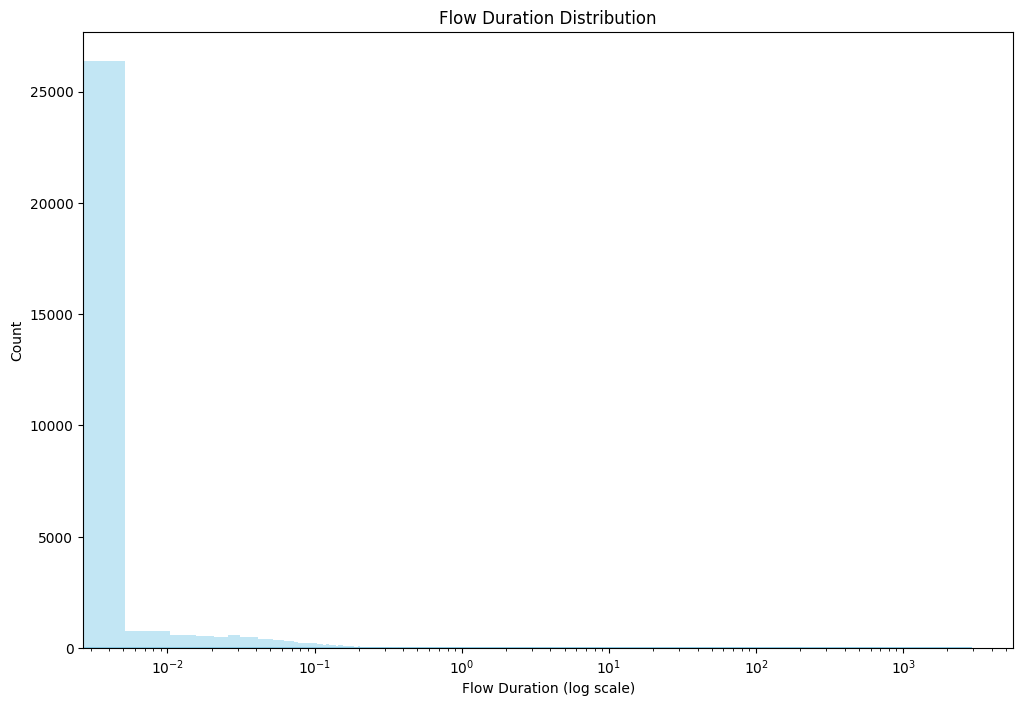

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(df['flow_duration'], kde=True, color='skyblue')
plt.xscale('log')
plt.title('Flow Duration Distribution')
plt.xlabel('Flow Duration (log scale)')
plt.ylabel('Count')
plt.show()

**Dominance of Short Durations**
* The majority of flow durations are short, clustered around very low values. This is evident from the high count (over 25,000) at the lowest end of the scale ($10^{-2}$ and lower).

**Long Tail Distribution**
* There is a long tail in the distribution, with a gradual decrease in the count of flows as the duration increases. However, the count remains relatively low for durations above $10^{0}$ on the logarithmic scale.

#### Flag Features Distribution

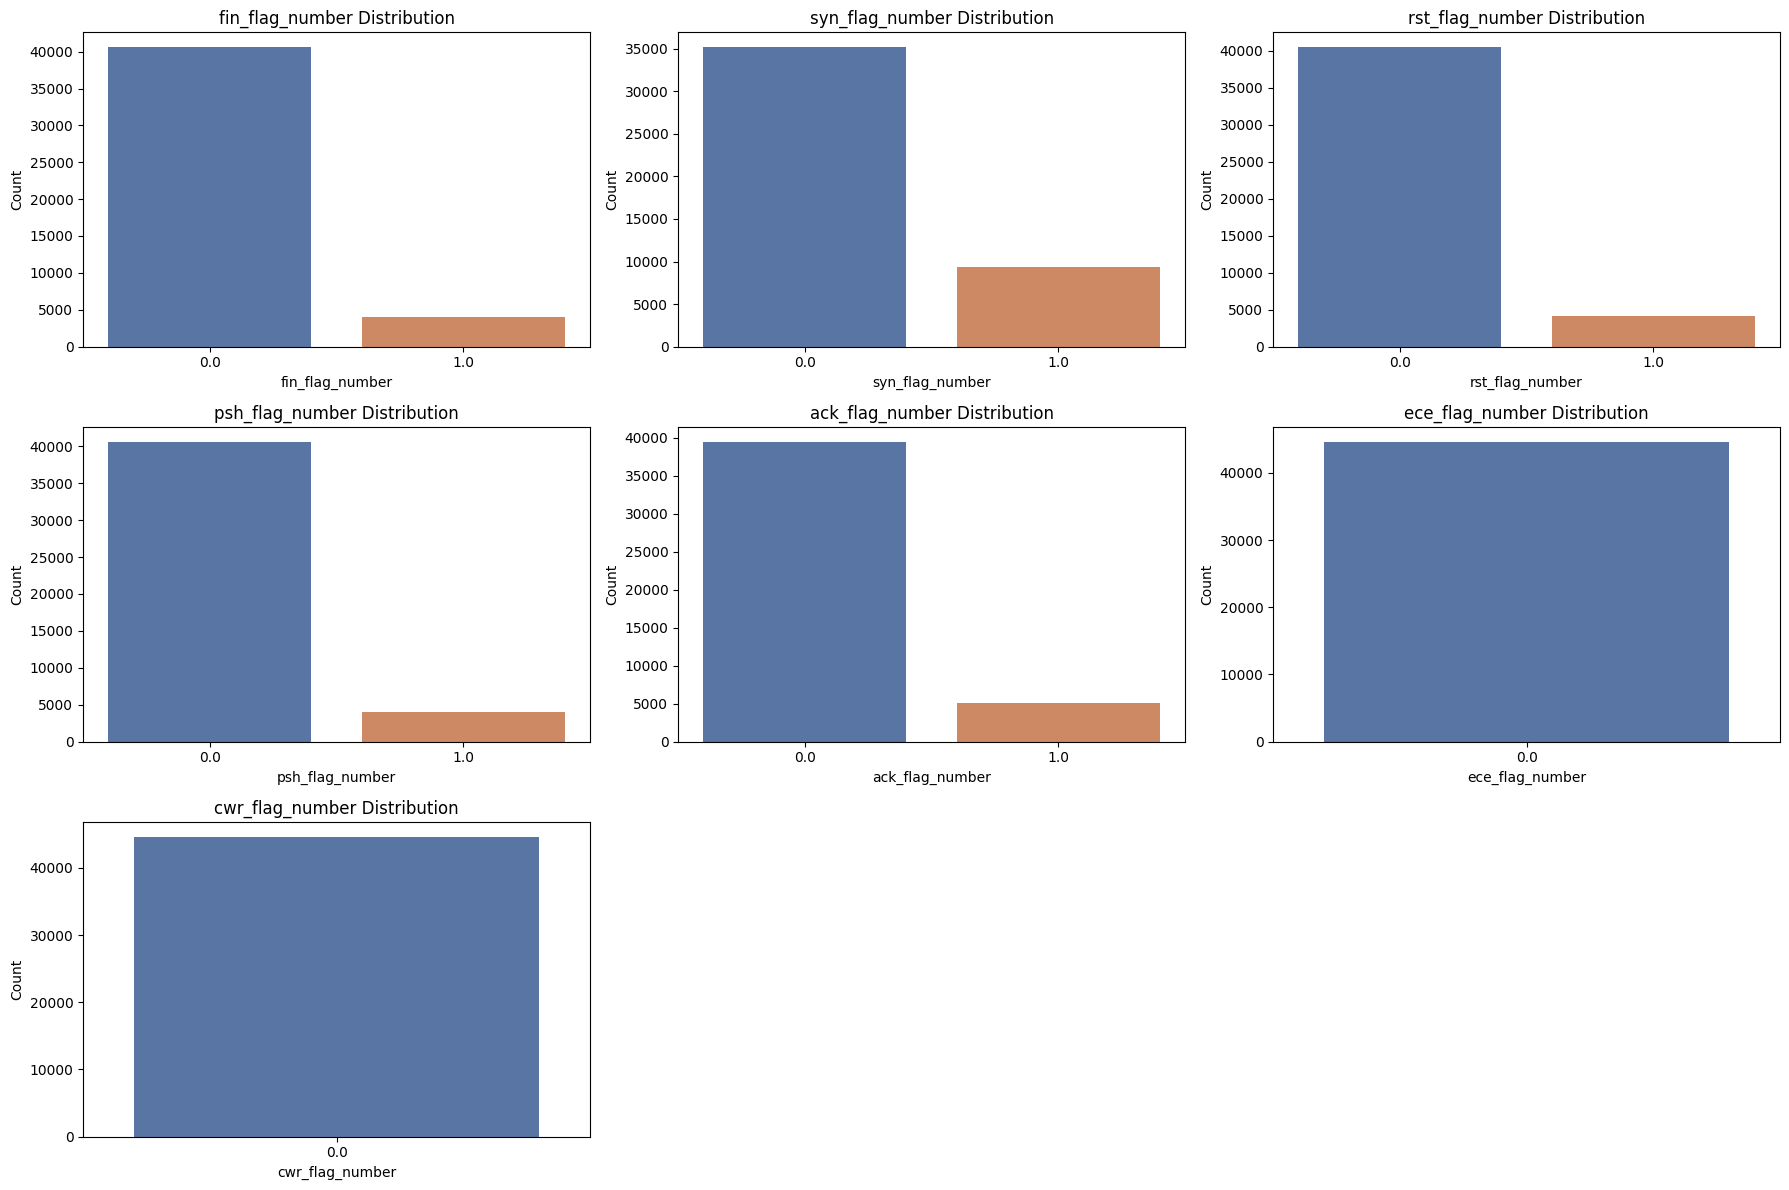

In [13]:
flags = ['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number']
plt.figure(figsize=(18, 12))

for i, flag in enumerate(flags):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=flag, hue=flag, palette='deep', dodge=False, legend=False)
    plt.title(f'{flag} Distribution')
    plt.xlabel(flag)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

`fin_flag_number` **Distribution**
* The majority of flows do not have the FIN flag set (`0.0`), with a smaller count having the FIN flag set (`1.0`).

`syn_flag_number` **Distribution**
* A large proportion of flows do not have SYN flag set (`0.0`), but there is a notable number of flows with the SYN flag set (`1.0`), indicating the presence of connection initiation attempts.

`rst_flag_number` **Distribution**
* Most flows do not have the RST flag set (`0.0`), with fewer flows having the RST flag set (`1.0`), suggesting relatively fewer connection resets.

`psh_flag_number` **Distribution**
* The PSH flag is not set (`0.0`) in most flows, with a smaller number of flows having the PSH flag set (`1.0`), indicating the presence of push operations in some traffic.

`ack_flag_number` **Distribution**
* Similar to other flags, the ACK flag is predominantly not set (`0.0`), but there is a significant number of flows with the ACK flag set (`1.0`), reflecting acknowledgment of packets.

`ece_flag_number` **Distribution**
* The ECE flag is entirely not set (`0.0`).

`cwr_flag_number` **Distribution**
* The CWR flag is uniformly not set (`0.0`).

For  flags like `fin_flag_number`, `rst_flag_number`, `psh_flag_number`, `ece_flag_number` and `cwr_flag_number`, most flows do not have these flags set. This indicates that these specific flags are not commonly used in the observed network traffic. The `syn_flag_number` shows a noticeable number of flows with the SYN flag set, which is expected as SYN is crucial for starting TCP connections. The `ack_flag_number` indicates that while many flows do not have the ACK flag set, a significant number do, reflecting packet acknowledgment and the presence of various states in TCP connections.

#### Packet Transmission Rates

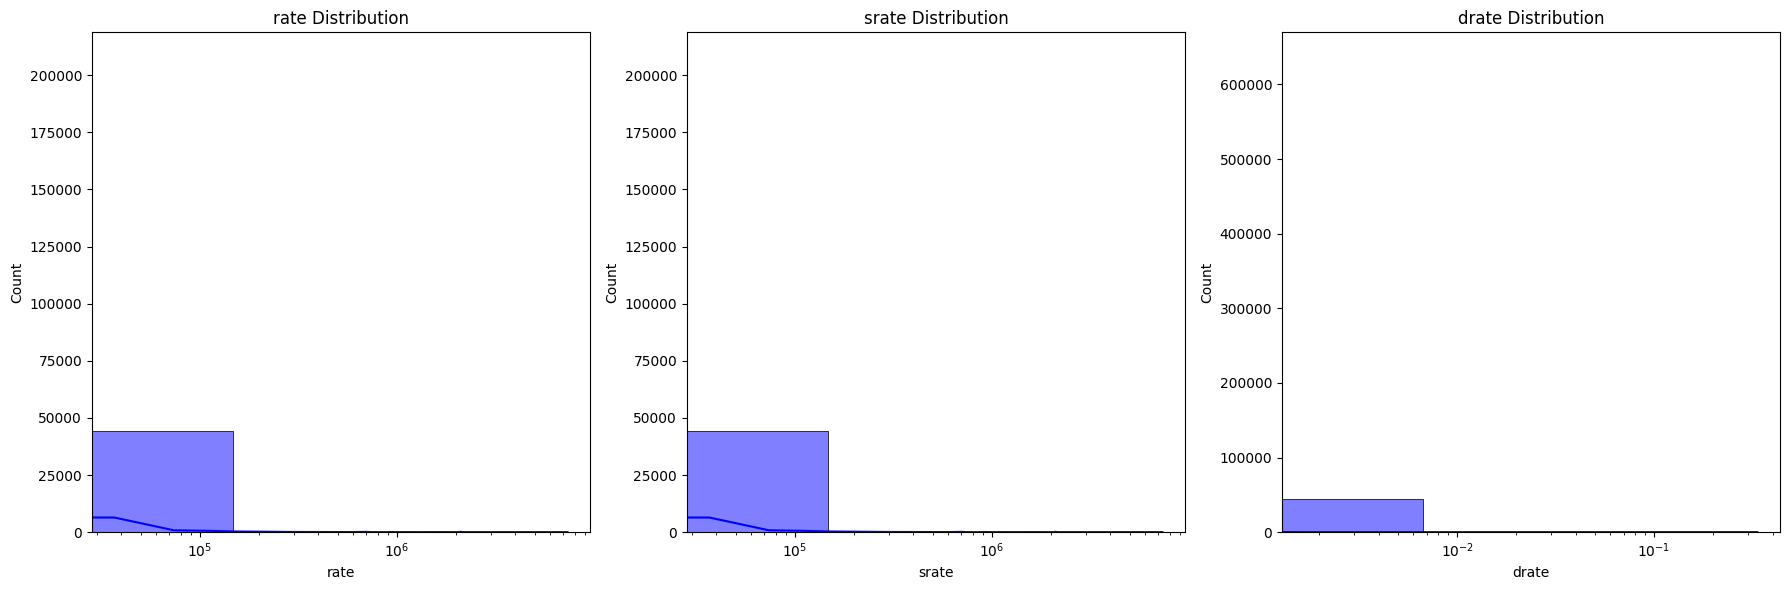

In [33]:
rates = ['rate', 'srate', 'drate']
plt.figure(figsize=(18, 6))

for i, rate in enumerate(rates):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[rate], kde=True, color='blue', bins=50)
    plt.xscale('log')
    plt.title(f'{rate} Distribution')
    plt.xlabel(rate)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

The histograms for `rate`, `srate`, and `drate` show that the majority of packet transmission rates are very low, with most values clustered around the lower end of the scale.

#### Packet Length Statistics

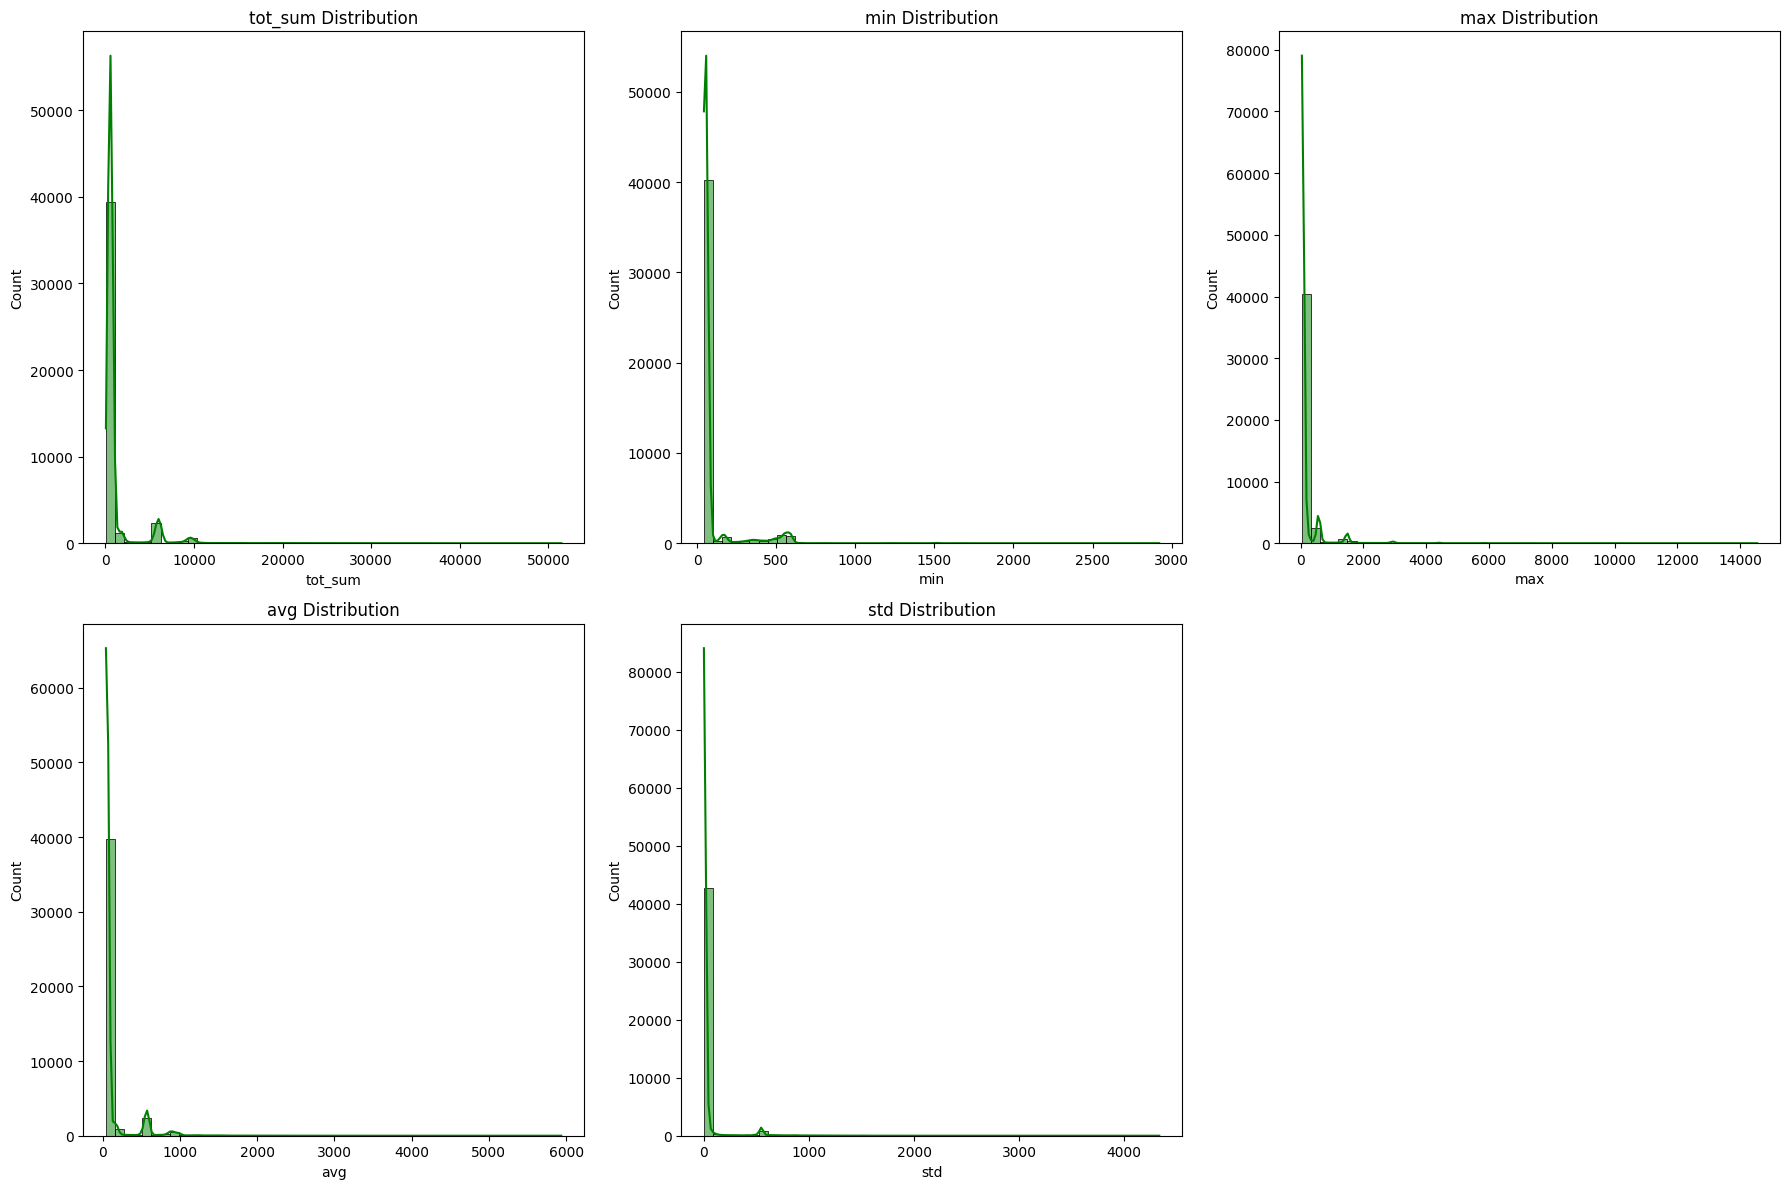

In [16]:
length_stats = ['tot_sum', 'min', 'max', 'avg', 'std']
plt.figure(figsize=(18, 12))

for i, stat in enumerate(length_stats):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[stat], kde=True, color='green', bins=50)
    plt.title(f'{stat} Distribution')
    plt.xlabel(stat)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Packet length distributions show that most network flows have smaller packets. Only occasionally there are packets of larger sizes.

#### Protocol Indicators

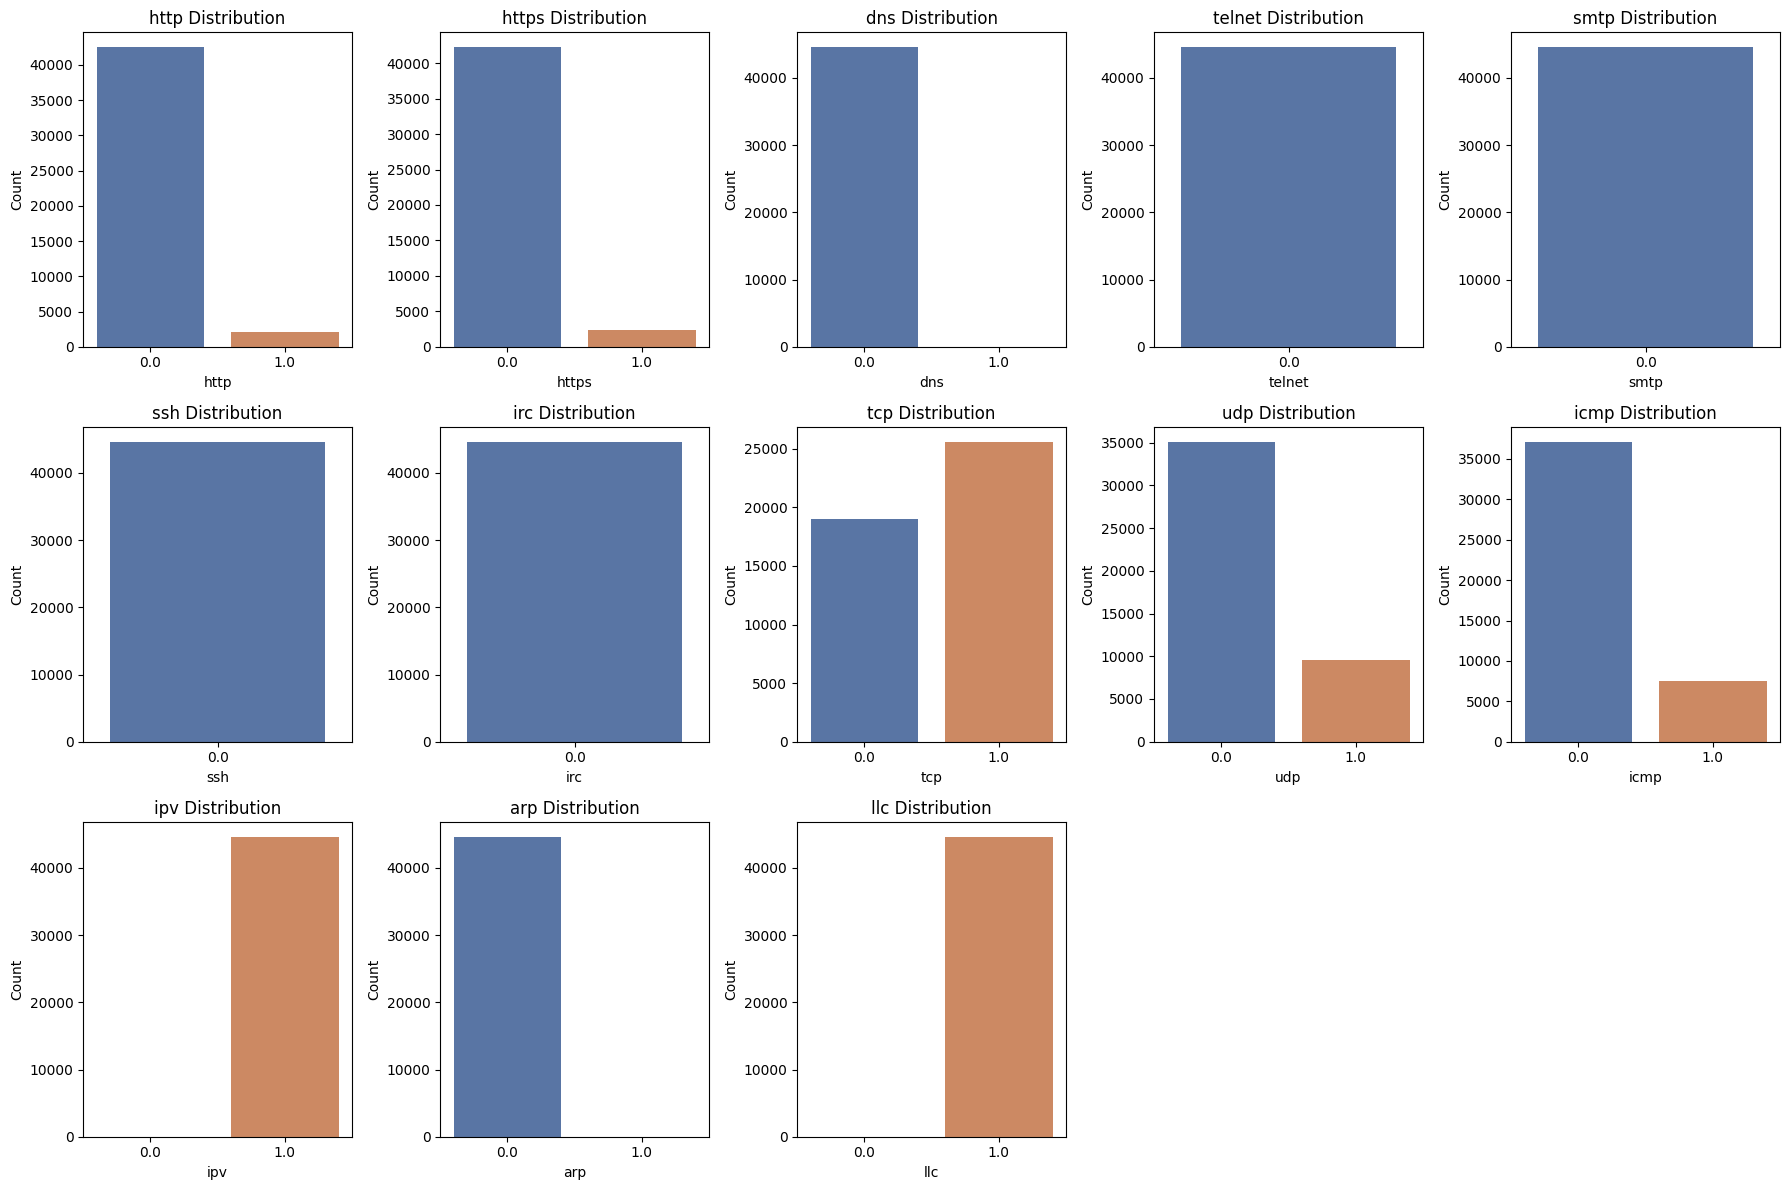

In [34]:
protocol_indicators = ['http', 'https', 'dns', 'telnet', 'smtp', 'ssh', 'irc', 'tcp', 'udp', 'icmp', 'ipv', 'arp', 'llc']
plt.figure(figsize=(18, 12))

for i, proto in enumerate(protocol_indicators):
    plt.subplot(3, 5, i + 1)
    sns.countplot(data=df, x=proto, hue=proto, palette='deep', legend=False)
    plt.title(f'{proto} Distribution')
    plt.xlabel(proto)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**HTTP (`http`) and HTTPS (`https`)**
* The majority of traffic does not use HTTP and HTTPS (`0.0`). 
* Only smaller but noticeable portion is using HTTP and HTTPS (`1.0`).

**DNS (`dns`), Telnet (`telnet`) and SMTP (`smtp`)**
* Almost no traffic uses DNS (`1.0`). 
* There is no Telnet activity in the dataset.
* There is no SMTP traffic in the dataset.

**SSH (`ssh`) and IRC (`irc`)**
* There is no SSH activity.
* There is no traffic using IRC.

**TCP (`tcp`) and UDP (`udp`)**
* TCP traffic is fairly balanced, with a slightly higher count for TCP traffic (`1.0`) compared to non-TCP traffic (`0.0`).
* There is a higher count for non-UDP traffic (`0.0`), with a smaller portion of the traffic using UDP (`1.0`).

**ICMP (`icmp`)**
* The majority of the traffic does not use ICMP (`0.0`), with a smaller but significant portion using ICMP (`1.0`).

**IPv (`ipv`), ARP (`arp`) and LLC (`llc`)**
* All traffic uses the IP protocol.
* There is no traffic using ARP. 
* All traffic uses the LLC protocol.

### Binary Classification Label Distribution

In [35]:
df['label_binary'] = df['label'].apply(lambda x: 'Benign' if x == 'BenignTraffic' else 'Attack')
binary_class_distribution = df['label_binary'].value_counts()
print(binary_class_distribution)

label_binary
Attack    43531
Benign     1016
Name: count, dtype: int64


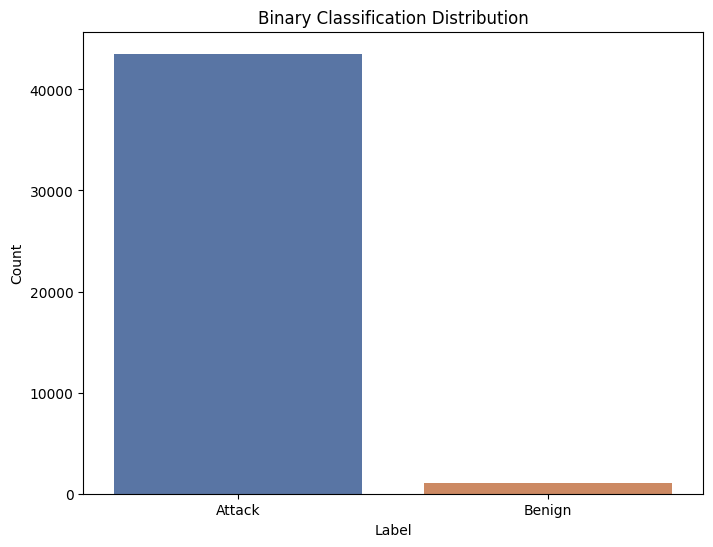

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label_binary', hue='label_binary', palette='deep', dodge=False)
plt.title('Binary Classification Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

The dataset is highly imbalanced, with "Attack" labels being the dominant class. Machine learning models could become biased towards the majority class (Attack), potentially leading to less optimal performance in detecting "Benign" traffic.